## Loading the data and basic Statistical inferance about the data set

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:

#Loading file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Data 


In [0]:
data=pd.read_csv("/content/drive/My Drive/Zomato/zomato.csv")

In [0]:
df=data

In [289]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [290]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [0]:
# Reading the columns and the description anf info about the data set

In [292]:
df.columns
# this explains us about the different columns in the data collected 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [293]:
df.describe()
# we can see that only votes are the variable/int column thats why description gave the central paraeters of votes alone

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [294]:
df.info()
# will help us to know the type of data,nulls present in data,number of entries in data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [295]:
df.isnull().sum()
#Number of nulls in each column

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [0]:
# replacing the nulls in location

## Things to be done with Data set

Now Lets Make steps that we have to work on

1. Lets find the number of the location with  restaruents
2. Lets find the number of Restarunt names in our data set
3. Lets find the restaruents in each location
4. Lets find the total number of restarunts that accept the online orders
5. Location wise count of Online and Oflien Orders of Restarunts
6. Lets find the restarunts,where we can book a table
7. find the different restarunt types in each location
8. find the different cuisines offered by restarunts
9. find the cost for 2 people
10.Lets list different restarunts according to rate  locatoin wise and the cost for two people

## Remove the unwanted column from data set


In [0]:
# droping the url as it not needed

In [0]:
df.drop("url",axis=1,inplace=True)

In [0]:
df.drop(['menu_item'],axis=1,inplace=True)

##1. Lets find the number of the location with  restaruents



#### Replacing the null values

In [0]:
df["location"].fillna("none",inplace=True)

#### Count of the locations with restarunts in Bangalore

In [301]:
loct=df["location"].value_counts()
print(len(loct))
print("\n")
loct.head()

94




BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Name: location, dtype: int64

### Lets Plot the Count of restarunts graph with location

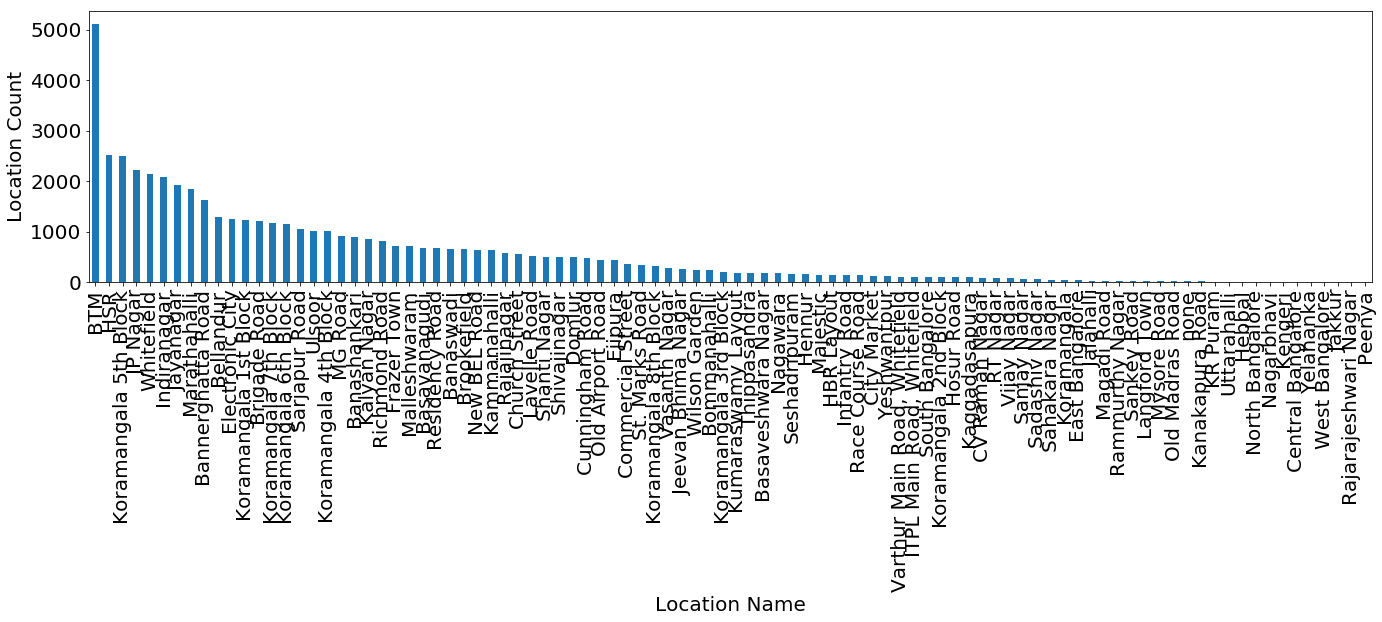

In [302]:
fig=plt.figure(figsize=(23,5))
loct.plot(kind="bar",fontsize=20)
plt.ylabel("Location Count",fontsize=20)
plt.xlabel("Location Name",fontsize=20)
plt.show()

## **2.Lets find  the count of restarunts **

#### Restarunts count in Data set

In [0]:
# replacing the contents in name filed as per the userd readability

In [0]:
df["name"].replace("CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley","cafe down the alley",inplace=True)
df["name"].replace('b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© - Shangri-La Hotel','Shangri-La Hotel',inplace=True)
df["name"].replace('SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine','santa spa cuisine',inplace=True)
df["name"].replace("Chikki's CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©","CHikki Cafe",inplace=True)
df["name"].replace("MumÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂs Kitchen","Muma Kitchen",inplace=True)
df["name"].replace("CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© MH-28","Cafe",inplace=True)
df["name"].replace("Draggers CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©","Draggers Cafe",inplace=True)
df["name"].replace("CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Mor'ish","Cafe Morish",inplace=True)
df["name"].replace("Mint Spice CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© & Restaurant ","Mint Spice Cafe",inplace=True)
df["name"].replace("Le ChÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©ri","Le Chari",inplace=True)
df["name"].replace("Moto Store & CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©","Moto Store & Cafe",inplace=True)
df["name"].replace("CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Felix","Cafe Felix",inplace=True)

In [305]:
df["name"].value_counts().head()

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Name: name, dtype: int64

In [306]:
# Highest count of branshes of a restarunt in Bangalore is Cafe Cofee Day
df["name"].value_counts().head(1)

Cafe Coffee Day    96
Name: name, dtype: int64

## 3. Lets find the restaruents in each location
*This will us with the count of the same restarunt in that location
ex: Cafe Cfee day in hsr :10(this is conted with the help of the online orders)

#### Lets create a Data frame with the count as 1 in separately So that we can decide how to improve the salles of the restarunt and study the for the limited sources

In [0]:
Rest_1=df["name"].value_counts()[(df["name"].value_counts().values)==1]

In [308]:
Rest_1

Om Sai Punjabi Dhabha                        1
Bollywood Grill                              1
CHAATter Box                                 1
Sanadige - Goldfinch Hotel                   1
Sri Ganesh Upahar                            1
Sri Rajarajeswari Andhra Mess                1
The Hungry Yeti                              1
Shy Chef                                     1
Mum?s Kitchen                                1
7Biryanis                                    1
The Foodware Veg                             1
Shakar Maanes Kitchen                        1
Hotel Royal Darbar                           1
Tea Garden                                   1
Cheezy Subs & Sandwiches                     1
Ice Fort                                     1
NS Garden Restaurant                         1
Just@99                                      1
Vrikshah Kitchens                            1
Parijatha Paradise                           1
Potu's kitchen                               1
Grand Fast Fo

#### group location with respect to restaruents  in one location

In [0]:
g1=df[["name","location","online_order"]].groupby(["name","location"]).count().sort_values(by="name")

This will us the count of the same restarunt in that location
ex: Cafe Cfee day in hsr :10(this is conted with the help of the online orders)

In [310]:
print(len(g1))
g1.head()

12151


,,online_order
name,location,
#FeelTheROLL,Bellandur,2
#L-81 Cafe,HSR,9
#Vibes Restro,Electronic City,3
#refuel,Bannerghatta Road,3
'Brahmins' Thatte Idli,Basaveshwara Nagar,1


 ## 4. Lets count the number of online order that are accepected by restarunts,location wise and restarunt wise
  
  

### count of the Restaruents that accepect the online orders

In [312]:
df["online_order"].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

###.Count of the restarunts and locations that accepect the online orders*

In [313]:
OD=df[["online_order","name","location"]].groupby(["online_order"]).count()
OD

,name,location
online_order,,
No,21273,21273
Yes,30444,30444


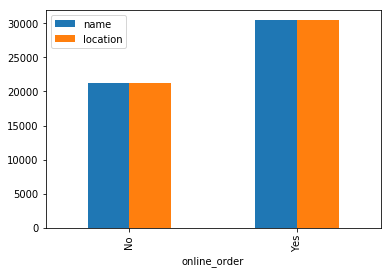

In [314]:
OD.plot(kind="bar",figsize=(6,4));

## 5. Location wise count of Online and Ofline Orders of Restarunts

.

#### Count of the  restarunts accepting the online orders Locations wise 

In [0]:
df["online_order"].replace("Yes",1,inplace=True)
df["online_order"].replace("No",0,inplace=True)

In [0]:
ODL=df[["location","online_order","name"]].groupby(["location","online_order"]).count()

In [317]:
ODL.head()

name
location     online_order      
BTM          0             1792
             1             3332
Banashankari 0              397
             1              509
Banaswadi    0              321

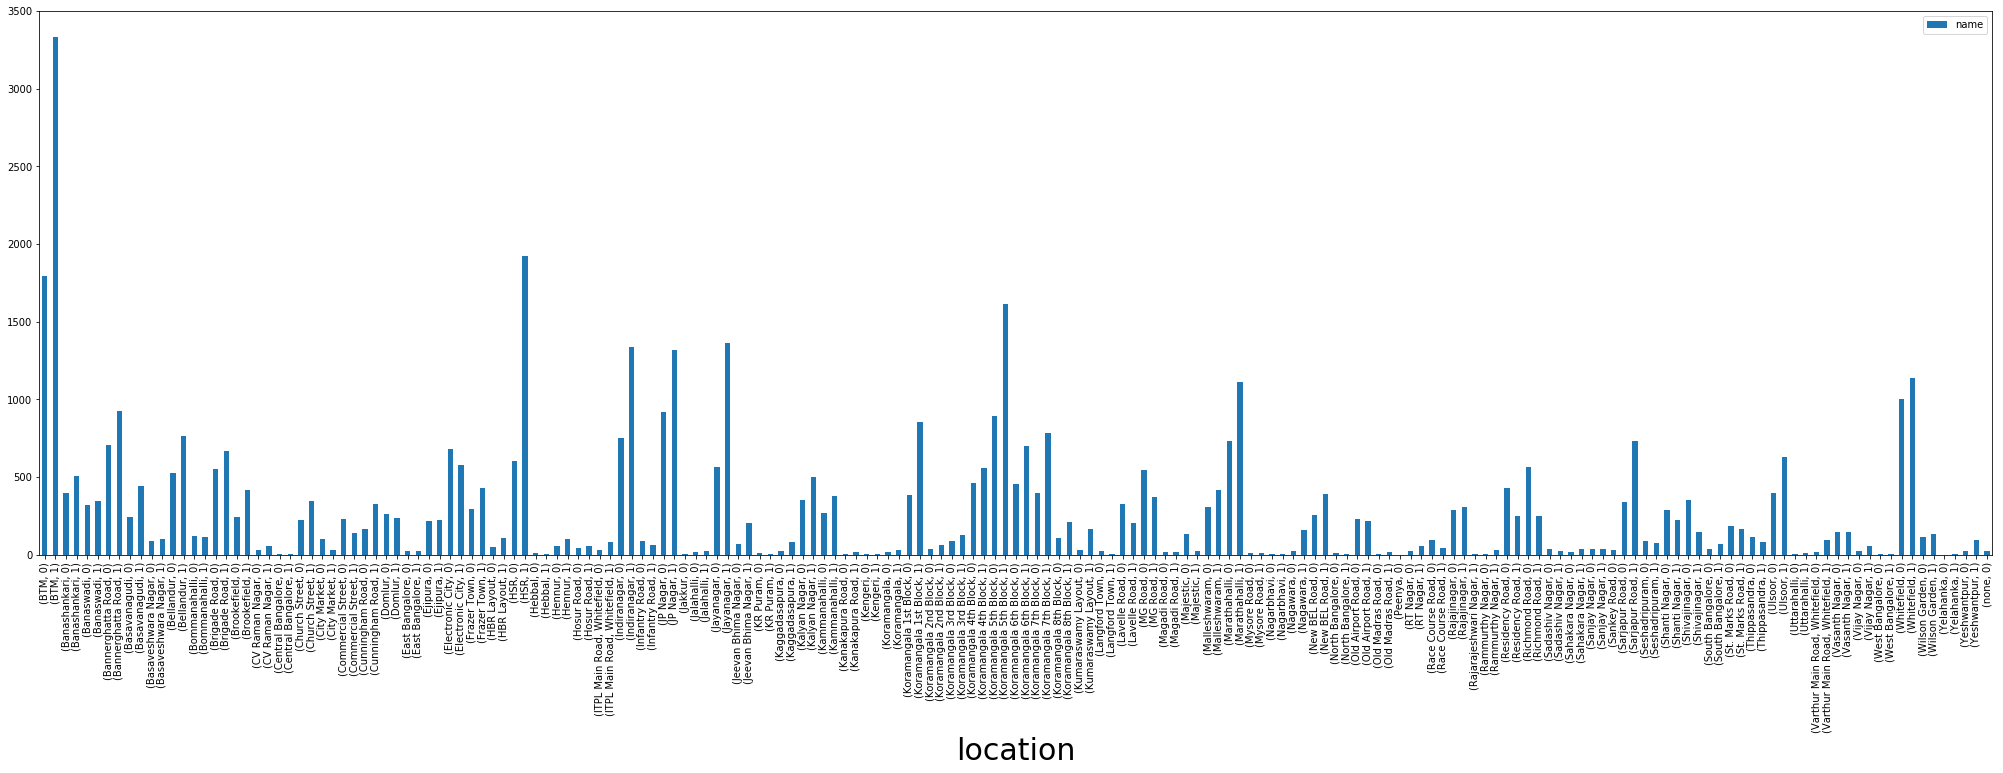

In [318]:
ODL.plot(kind="bar",figsize=(35,10))
plt.xlabel("location",fontsize=30)
plt.show()

#### Count of the  restarunts accepting the online orders Locations wise -Factorised locations


In [0]:
Q=pd.DataFrame(df["name"].values,columns=["restarunt_name"])
Q["location"]=df["location"]
Q["online_order"]=df["online_order"]

In [0]:
labels,uniques=pd.factorize(Q["location"])
labels1,unique1=pd.factorize(Q["restarunt_name"])

In [0]:
Q["location"]=labels
Q["restarunt_name"]=labels1


In [322]:
uniques

Index(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'none', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeev

In [323]:
Q

,restarunt_name,location,online_order
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,0
4,4,1,0
5,5,1,1
6,6,2,0
7,7,0,1
8,8,0,1
9,9,0,1


In [324]:
Q["location"].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93])

In [325]:
QG=Q.groupby(["location","online_order"]).count()
QG.head()

restarunt_name
location online_order                
0        0                        397
         1                        509
1        0                        243
         1                        441
2        0                         12

In [326]:
len(QG)

183

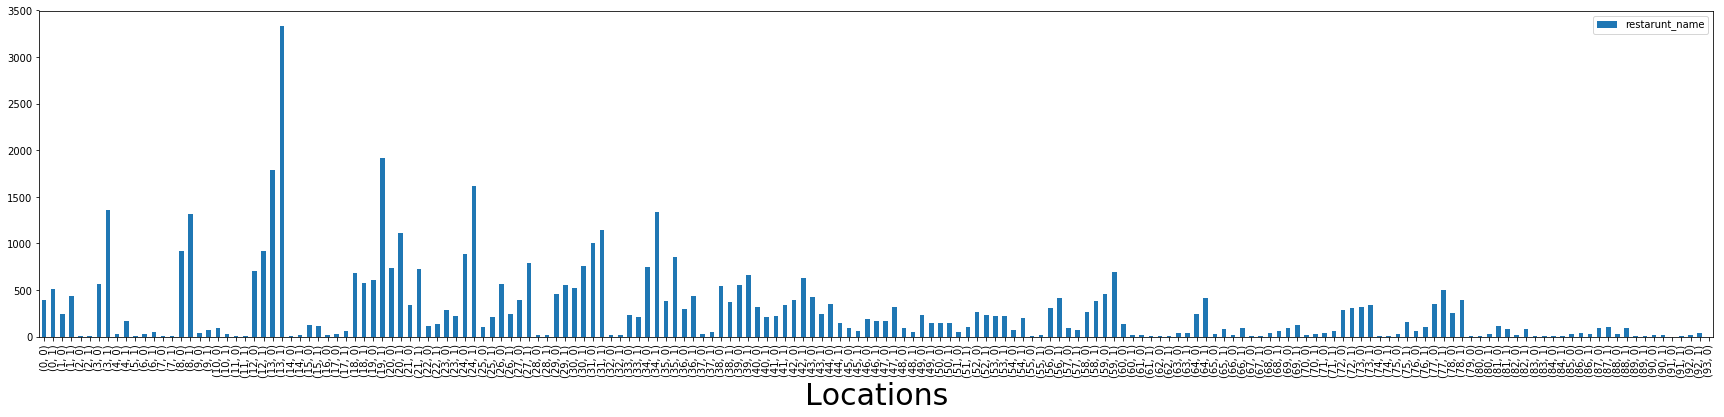

In [327]:
QG.plot(kind="bar",figsize=(30,6))
plt.xlabel("Locations",fontsize=30)
plt.legend()
plt.show()

## 6. Lets find the restarunts,where we can book a table

In [67]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'cuisine_1', 'cuisine_2', 'cuisine_3', 'cuisine_4',
       'cuisine_5', 'cuisine_6', 'cuisine_7', 'cuisine_8'],
      dtype='object')

In [44]:
df["book_table"].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [0]:
book_table=df[["location","name","book_table","approx_cost(for two people)"]].groupby(["book_table"]).count()

In [46]:
book_table

,location,name,approx_cost(for two people)
book_table,,,
No,45268,45268,44922
Yes,6449,6449,6449


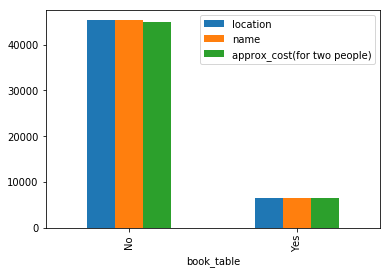

In [47]:
book_table.plot(kind="bar");

## 7. find the different restarunt types in each location

In [328]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [0]:
rest=df["rest_type"]

##8. Cuisines offered by restarunts


#### Different Cuisines offered by restarunts

In [330]:
df["cuisines"].head()

0    North Indian, Mughlai, Chinese
1       Chinese, North Indian, Thai
2            Cafe, Mexican, Italian
3        South Indian, North Indian
4          North Indian, Rajasthani
Name: cuisines, dtype: object

#### Replacing the nulls with none string

In [0]:
df["cuisines"].fillna("none",inplace=True)

#### Tranforming the data into user understanding and model accessable form

In [0]:
# Takign the data into other frame  to make the changes
t=df["cuisines"]

In [333]:
t.iloc[0]  # list of strings as one string -> this has to  be converted to list of strings using split

'North Indian, Mughlai, Chinese'

In [334]:
# example for spliting the given string into list
t.iloc[0].split(",")

['North Indian', ' Mughlai', ' Chinese']

In [0]:
#Empty list to strore the new list of cuisines
b=[]

In [0]:
# Using for loop we are spliting the cuisines(in string formate) into the list of strings
for i in range(len(t)):
    b.append(t.iloc[i].split(","))

In [337]:
print(len(b))
print(type(b))

51717
<class 'list'>


In [338]:
b[4:8]

[['North Indian', ' Rajasthani'],
 ['North Indian'],
 ['North Indian', ' South Indian', ' Andhra', ' Chinese'],
 ['Pizza', ' Cafe', ' Italian']]

In [0]:
s=pd.DataFrame()

In [0]:
s=pd.DataFrame(b)

In [0]:
# adding the splited cuisines list to the data set
df["cuisine_1"]=s[0]
df["cuisine_2"]=s[1]
df["cuisine_3"]=s[2]
df["cuisine_4"]=s[3]
df["cuisine_5"]=s[4]
df["cuisine_6"]=s[5]
df["cuisine_7"]=s[6]
df["cuisine_8"]=s[7]

In [342]:
s.head()

,0,1,2,3,4,5,6,7
0,North Indian,Mughlai,Chinese,None,None,None,None,None
1,Chinese,North Indian,Thai,None,None,None,None,None
2,Cafe,Mexican,Italian,None,None,None,None,None
3,South Indian,North Indian,None,None,None,None,None,None
4,North Indian,Rajasthani,None,None,None,None,None,None


In [343]:
# checking with the added columns
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'cuisine_1', 'cuisine_2', 'cuisine_3', 'cuisine_4',
       'cuisine_5', 'cuisine_6', 'cuisine_7', 'cuisine_8'],
      dtype='object')

cross checking

In [344]:
s[7].unique()

array([None, ' Burger', ' Desserts', ' Seafood', ' Sandwich', ' Andhra',
       ' Kerala', ' Salad', ' North Indian', ' Asian', ' Rolls',
       ' South Indian', ' Street Food', ' Pizza', ' Japanese', ' Chinese',
       ' European', ' Finger Food', ' Kebab', ' Thai', ' Fast Food',
       ' Tea'], dtype=object)

In [345]:
df["cuisine_8"].unique()

array([None, ' Burger', ' Desserts', ' Seafood', ' Sandwich', ' Andhra',
       ' Kerala', ' Salad', ' North Indian', ' Asian', ' Rolls',
       ' South Indian', ' Street Food', ' Pizza', ' Japanese', ' Chinese',
       ' European', ' Finger Food', ' Kebab', ' Thai', ' Fast Food',
       ' Tea'], dtype=object)

In [0]:
# Droping the cuisines column from the main data set as the splited lis is added to the main list
df.drop("cuisines",axis=1,inplace=True)

## 9. Finding the highest and lowest cost of the restarunts


####Changing the String function to int -> approx_cost(for two people)

In [0]:
df["approx_cost(for two people)"].fillna(0,inplace=True)

In [0]:
df["approx_cost(for two people)"].replace(0,"0",inplace=True)

In [349]:
df["approx_cost(for two people)"].values

array(['800', '800', '800', ..., '2,000', '2,500', '1,500'], dtype=object)

In [0]:
u=df["approx_cost(for two people)"].unique()

In [351]:
len(u)

71

In [0]:
for i in range(0,71):
    df["approx_cost(for two people)"].replace(u[i],(int(df["approx_cost(for two people)"][df[(df["approx_cost(for two people)"].values)==u[i]].index[0]].replace(",",""))),inplace=True)

In [353]:
df["approx_cost(for two people)"].values

array([ 800,  800,  800, ..., 2000, 2500, 1500])

####Dividing the highest and the lowest cost @ restarunts


In [423]:
print("median value of cost",np.median(df["approx_cost(for two people)"].sort_values().unique()))
df["approx_cost(for two people)"].sort_values().unique()

median value of cost 900.0


array([   0,   40,   50,   60,   70,   80,  100,  120,  130,  140,  150,
        160,  180,  190,  199,  200,  230,  240,  250,  300,  330,  350,
        360,  400,  450,  469,  500,  550,  560,  600,  650,  700,  750,
        800,  850,  900,  950, 1000, 1050, 1100, 1200, 1250, 1300, 1350,
       1400, 1450, 1500, 1600, 1650, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 3000, 3200, 3400, 3500, 3700,
       4000, 4100, 4500, 5000, 6000])

In [355]:
print(len(df[(df["approx_cost(for two people)"].values)==0]))

No_cost=df[(df["approx_cost(for two people)"].values)==0].head()

346


In [356]:
No_cost

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),cuisine_1,cuisine_2,cuisine_3,cuisine_4,cuisine_5,cuisine_6,cuisine_7,cuisine_8
1662,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,0,No,NaN,0,NaN,none,NaN,NaN,0,[],Delivery,Bannerghatta Road,none,None,None,None,None,None,None,None
1768,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,0,No,NaN,0,NaN,JP Nagar,Delivery,NaN,0,[],Delivery,Bannerghatta Road,Beverages,None,None,None,None,None,None,None
1795,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),0,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,0,"[('Rated 1.0', 'RATED\n Many items were missi...",Delivery,Bannerghatta Road,North Indian,Chinese,South Indian,None,None,None,None,None
3069,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),0,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,0,"[('Rated 1.0', 'RATED\n Many items were missi...",Delivery,Basavanagudi,North Indian,Chinese,South Indian,None,None,None,None,None
3774,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,0,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",0,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",Buffet,Bellandur,Finger Food,None,None,None,None,None,None,None


In [432]:
df["approx_cost(for two people)"].sort_values().unique()

array([   0,   40,   50,   60,   70,   80,  100,  120,  130,  140,  150,
        160,  180,  190,  199,  200,  230,  240,  250,  300,  330,  350,
        360,  400,  450,  469,  500,  550,  560,  600,  650,  700,  750,
        800,  850,  900,  950, 1000, 1050, 1100, 1200, 1250, 1300, 1350,
       1400, 1450, 1500, 1600, 1650, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 3000, 3200, 3400, 3500, 3700,
       4000, 4100, 4500, 5000, 6000])

In [0]:
high_cost=df[(df["approx_cost(for two people)"].values)>1500].head()

In [434]:
high_cost

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),cuisine_1,cuisine_2,cuisine_3,cuisine_4,cuisine_5,cuisine_6,cuisine_7,cuisine_8
868,"67, 15th Cross, 6th B Main, JP Nagar, Bangalore",Barbeque Nation,0,Yes,4.7/5,3845,+91 8064806060,JP Nagar,Casual Dining,"Lunch Buffet, Goan Fish Curry, Mocktails, Chic...",1600,"[('Rated 5.0', 'RATED\n It is awesome place. ...",Buffet,Bannerghatta Road,North Indian,European,Mediterranean,BBQ,Kebab,None,None,None
1151,"55, 5th Floor, Goenka Chambers, 19th Main Road...",Brewsky,1,Yes,4.4/5,4309,+91 9880438170\r\r\n+91 9880661701,JP Nagar,Microbrewery,"Pork Chops, Craft Beer, Chicken Biryani, Chowm...",1600,"[('Rated 5.0', 'RATED\n It?s on roof top, nic...",Delivery,Bannerghatta Road,Continental,American,None,None,None,None,None,None
1649,"4th Floor, Royal Meenakshi Mall, Hulimavu, Ban...",TGI Fridays,1,Yes,3.9/5,1337,080 67080290\r\n080 67080291,Bannerghatta Road,Lounge,"Cocktails, Salads, Burgers, Long Island Iced T...",1700,"[('Rated 3.0', ""RATED\n I've been coming here...",Delivery,Bannerghatta Road,American,Burger,Italian,Steak,None,None,None,None
2006,"500, 3rd Floor, 2nd Block, 2nd Phase, BTM Layo...",Terrace Lounge,0,No,3.6/5,25,+91 7022001251\r\n+91 7022001252,Bannerghatta Road,Lounge,NaN,1600,"[('Rated 3.5', 'RATED\n Awesome ambiance........",Dine-out,Bannerghatta Road,North Indian,Chinese,Seafood,None,None,None,None,None
2242,"67, 15th Cross, 6th B Main, JP Nagar, Bangalore",Barbeque Nation,0,Yes,4.7/5,3844,+91 8064806060,JP Nagar,Casual Dining,"Lunch Buffet, Goan Fish Curry, Mocktails, Chic...",1600,"[('Rated 5.0', 'RATED\n It is awesome place. ...",Dine-out,Bannerghatta Road,North Indian,European,Mediterranean,BBQ,Kebab,None,None,None


## PHONE NUMBER 

In [0]:
phone_number=pd.DataFrame()
phone_number1=pd.DataFrame()

In [403]:
df["phone"].head()

0      080 42297555\r\n+91 9743772233
1                        080 41714161
2                      +91 9663487993
3                      +91 9620009302
4    +91 8026612447\r\n+91 9901210005
Name: phone, dtype: object

In [0]:
df["phone"].fillna('0',inplace=True)

In [0]:
ph=[]
ph=(df["phone"])

In [0]:
p=[]
for i in range(0,len(ph)):
#    print(ph[i])
    p.append(ph[i].split("\r\n"))
    
    

In [0]:
phone_number=pd.DataFrame(p,columns=["contact","Alternate_contact"])

In [408]:
phone_number.head()

,contact,Alternate_contact
0,080 42297555,+91 9743772233
1,080 41714161,None
2,+91 9663487993,None
3,+91 9620009302,None
4,+91 8026612447,+91 9901210005


In [409]:
phone_number.shape

(51717, 2)

In [0]:
ph1=phone_number["contact"]

In [0]:
p1=[]
for i in range(0,len(ph1)):
#    print(ph[i])
    p1.append(ph1[i].split("\n"))       

In [0]:
phone_number1=pd.DataFrame(p1,columns=["contact","Alternate_contact"])

In [413]:
phone_number.tail()

,contact,Alternate_contact
51712,080 40301477,None
51713,+91 8197675843,None
51714,0,None
51715,080 49652769,None
51716,+91 8071117272,None


In [0]:
phone_number1 = phone_number1.merge(phone_number,how='inner',left_index =True,right_index = True)

In [415]:
phone_number1.head()

,contact_x,Alternate_contact_x,contact_y,Alternate_contact_y
0,080 42297555,None,080 42297555,+91 9743772233
1,080 41714161,None,080 41714161,None
2,+91 9663487993,None,+91 9663487993,None
3,+91 9620009302,None,+91 9620009302,None
4,+91 8026612447,None,+91 8026612447,+91 9901210005


In [0]:
phone_number1.drop("contact_y",axis=1,inplace=True)

In [420]:
phone_number1.head()

,contact_x,Alternate_contact_x,Alternate_contact_y
0,080 42297555,None,+91 9743772233
1,080 41714161,None,None
2,+91 9663487993,None,None
3,+91 9620009302,None,None
4,+91 8026612447,None,+91 9901210005


In [422]:
phone_number1.tail(10)

,contact_x,Alternate_contact_x,Alternate_contact_y
51707,080 49435000,None,None
51708,080 39451000,+91 8884038484,None
51709,+91 9980121279,+91 9900240646,None
51710,+91 9148155994,None,None
51711,080 65951222,None,None
51712,080 40301477,None,None
51713,+91 8197675843,None,None
51714,0,None,None
51715,080 49652769,None,None
51716,+91 8071117272,None,None


In [0]:
df["contact_number"]=phone_number1["contact_x"]
df["Alternate_number1"]=phone_number1["Alternate_contact_x"]
df["Alternate_number2"]=phone_number1["Alternate_contact_y"]

In [442]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'cuisine_1', 'cuisine_2', 'cuisine_3', 'cuisine_4',
       'cuisine_5', 'cuisine_6', 'cuisine_7', 'cuisine_8', 'contact_number',
       'Alternate_number1', 'Alternate_number2'],
      dtype='object')

In [0]:
df.drop("phone",axis=1,inplace=True)

## MOdified data set

In [445]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)', 'cuisine_1',
       'cuisine_2', 'cuisine_3', 'cuisine_4', 'cuisine_5', 'cuisine_6',
       'cuisine_7', 'cuisine_8', 'contact_number', 'Alternate_number1',
       'Alternate_number2'],
      dtype='object')

In [452]:
df["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [454]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),cuisine_1,cuisine_2,cuisine_3,cuisine_4,cuisine_5,cuisine_6,cuisine_7,cuisine_8,contact_number,Alternate_number1,Alternate_number2
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,North Indian,Mughlai,Chinese,None,None,None,None,None,080 42297555,None,+91 9743772233
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,Chinese,North Indian,Thai,None,None,None,None,None,080 41714161,None,None
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,Cafe,Mexican,Italian,None,None,None,None,None,+91 9663487993,None,None
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,South Indian,North Indian,None,None,None,None,None,None,+91 9620009302,None,None
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,North Indian,Rajasthani,None,None,None,None,None,None,+91 8026612447,None,+91 9901210005
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,1,No,3.8/5,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari,North Indian,None,None,None,None,None,None,None,+91 9980040002,None,+91 9980063005
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,0,No,3.6/5,8,Mysore Road,Casual Dining,NaN,800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari,North Indian,South Indian,Andhra,Chinese,None,None,None,None,+91 9731716688,None,080 26740366
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,1,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari,Pizza,Cafe,Italian,None,None,None,None,None,080 48653961,None,080 48655715
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,1,No,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",Cafes,Banashankari,Cafe,Italian,Continental,None,None,None,None,None,+91 8884135549,None,+91 9449449316
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,1,No,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes,Banashankari,Cafe,Mexican,Italian,Momos,Beverages,None,None,None,+91 9945230807,None,+91 9743804471


In [0]:
# The listed_in city column specifies the locations with restarunts  that come under which city 
# which may not help us much to study the data in detail as the location it self says this, so lets drop this column from data

In [472]:
df[["location","name","listed_in(city)"]].groupby("listed_in(city)").count().head()

,location,name
listed_in(city),,
BTM,3279,3279
Banashankari,863,863
Bannerghatta Road,1617,1617
Basavanagudi,1266,1266
Bellandur,1227,1227


In [0]:
df.drop("listed_in(city)",axis=1,inplace=True)


In [475]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'cuisine_1', 'cuisine_2',
       'cuisine_3', 'cuisine_4', 'cuisine_5', 'cuisine_6', 'cuisine_7',
       'cuisine_8', 'contact_number', 'Alternate_number1',
       'Alternate_number2'],
      dtype='object')